# Vanilla Gradient Descent

This notebook applies the most basic gradient descent to predict `Happiness.Score` from `Economy..GDP.per.Capita.`. The dataset used is the World Happiness Report

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('data/2017.csv')

In [3]:
economy = df['Economy..GDP.per.Capita.'].values
happiness = df['Happiness.Score'].values

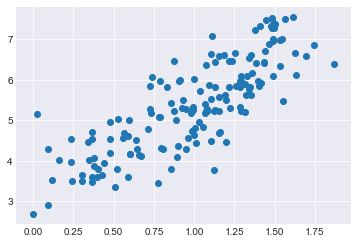

In [4]:
plt.scatter(economy, happiness)

# Gradient Descent

**Vanilla Gradient Descent** is used.

```python
update = learning_rate * gradient_of_parameters
parameters = parameters - update
```

\begin{align}
y' &=& mx + c \\
error &=& \frac{1}{N} \sum_{}(y - y') ^ 2 \\
\frac{\partial error}{\partial m} &=& -\frac{2}{N} * (y - y') * x \\
\frac{\partial error}{\partial c} &=& -\frac{2}{N} * (y - y') \\
\end{align}

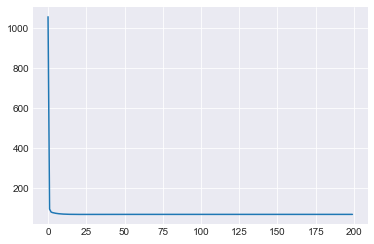

In [5]:
learning_rate = 0.0001
epochs = 200

n = len(happiness)

m = 0
c = 0

# a list of mean squared errors through the epochs
errors = []

for epoch in range(epochs):
    
    error = 0
    
    for x, y in zip(economy, happiness):
        
        # mean squared error
        error += (y - (m * x + c)) ** 2
        
        # gradient of parameters
        m_delta = -n * 0.5 * (y - (m * x + c)) * x
        c_delta = -n * 0.5 * (y - (m * x + c))
        
        m_update = learning_rate * m_delta
        c_update = learning_rate * c_delta
        
        m -= m_update
        c -= c_update
        
    errors.append(error)
        
        
plt.plot(errors)

As expected, the mean squared error reduces with epochs. After a few epochs, it is near-constant.

# Plotting the line of best fit

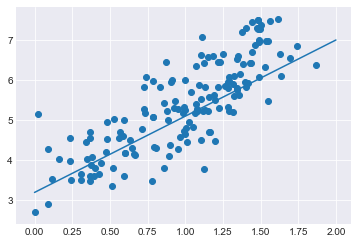

In [6]:
limit = int(round(np.max(happiness)))


plt.plot([m * x + c for x in range(3)])
plt.scatter(economy, happiness)

# Result

A line of best fit is obtained that describes the correlation between `Happiness.Score` and `Economy..GDP.per.Capita.`.